In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier,MLPRegressor

from sklearn.preprocessing import MinMaxScaler,OneHotEncoder



from copy import deepcopy

#sns.set_style('whitegrid')

# Questão 1
 

In [2]:
data = np.array([[0,0,0], [0,0,1], [0,1,0], [0,1,1],
              [1,0,0],[1,0,1],[1,1,0],[1,1,1]])

data.shape

(8, 3)

In [3]:
classes = np.array( [i for i in range(data.shape[0])] ).T

In [4]:
data = np.column_stack((data,classes))
data

array([[0, 0, 0, 0],
       [0, 0, 1, 1],
       [0, 1, 0, 2],
       [0, 1, 1, 3],
       [1, 0, 0, 4],
       [1, 0, 1, 5],
       [1, 1, 0, 6],
       [1, 1, 1, 7]])

In [5]:
df = pd.DataFrame(data, columns=['x_1','x_2','x_3','class'])
df

,x_1,x_2,x_3,class
0,0,0,0,0
1,0,0,1,1
2,0,1,0,2
3,0,1,1,3
4,1,0,0,4
5,1,0,1,5
6,1,1,0,6
7,1,1,1,7


In [6]:
def create_noise_df(df, number_new_data):#criar dataframe com ruido
    new_df = deepcopy(df)
    values = new_df[['x_1','x_2','x_3']].values
    
    for k in range(number_new_data):#criando ruido

        noise = np.array([np.random.uniform(-0.1,0.1) for i in range(24)]).reshape(8,3)

        new_values = values + noise

        for i in range(len(new_values)):#preencher novo data frame com os valores x1 x2 x3
            new_df.loc[len(new_df)] = [new_values[i][0],new_values[i][1],new_values[i][2],i]
    
    return new_df

In [7]:
noise_df = create_noise_df(df, 100)
noise_df = noise_df.sort_values(by=['class'])
noise_df

,x_1,x_2,x_3,class
0,0.000000,0.000000,0.000000,0.0
608,0.043001,-0.031746,0.072879,0.0
160,0.067026,-0.039051,-0.014807,0.0
600,0.004631,0.075904,0.037656,0.0
168,0.067120,0.027747,-0.072705,0.0
...,...,...,...,...
615,0.901554,0.937788,1.058750,7.0
151,1.058622,0.974576,1.066137,7.0
623,0.969104,0.924004,0.972864,7.0
215,0.949565,0.960750,0.985903,7.0


In [8]:
#criando x e y para perceptron 
x = noise_df[['x_1','x_2','x_3']].values
y = noise_df[['class']].values.ravel()
#train_test_split para separar a instancia em test e treino
#estamos usando 30% como treino
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)
x_train.shape , x_test.shape

((565, 3), (243, 3))

# Perceptron

In [9]:
model = Perceptron()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [10]:
print('Reporte: \n')
print(classification_report(y_test,y_pred))
print('Matriz de confusão: \n')
print(confusion_matrix(y_test,y_pred))

Reporte: 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        30
         1.0       1.00      1.00      1.00        36
         2.0       1.00      1.00      1.00        35
         3.0       1.00      1.00      1.00        32
         4.0       1.00      1.00      1.00        34
         5.0       1.00      1.00      1.00        31
         6.0       1.00      1.00      1.00        24
         7.0       1.00      1.00      1.00        21

    accuracy                           1.00       243
   macro avg       1.00      1.00      1.00       243
weighted avg       1.00      1.00      1.00       243

Matriz de confusão: 

[[30  0  0  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0]
 [ 0  0  0 32  0  0  0  0]
 [ 0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0 31  0  0]
 [ 0  0  0  0  0  0 24  0]
 [ 0  0  0  0  0  0  0 21]]


# Questão 2:
## Letra A

In [11]:
porta = np.array([[0,0,0],[0,1,1],[1,0,1],[1,1,0]])

In [12]:
df = pd.DataFrame(porta, columns=['x_0','x_1','saida'])

In [13]:
df

,x_0,x_1,saida
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [14]:
def create_noise_xor(df, number_new_dados):
    new_df = df.copy()
    values = new_df[['x_0','x_1']].values

    for passo in range(number_new_dados):
        
        ruido = np.array([np.random.uniform(-0.1,0.1) for i in range(8)]).reshape(4,2)
        new_values = values + ruido

        for i in range(len(new_values)):
            new_df.loc[len(new_df)] = [new_values[i][0],new_values[i][1],i]
            
    return new_df

In [15]:
df_xor = create_noise_xor(df, 100)

In [16]:
x_xor = df_xor[['x_0','x_1']].values
y_xor = df_xor[['saida']].values.ravel()

X_train, X_test, y_train, y_test = train_test_split(x_xor,y_xor, test_size=0.3)

X_train.shape,X_test.shape

((282, 2), (122, 2))

In [17]:
from sklearn.neural_network import MLPClassifier #camadas ocultas = 100 por padrão
model = MLPClassifier(activation='relu', max_iter=1000)

In [18]:
model.fit(X_train, y_train)

MLPClassifier(max_iter=1000)

In [19]:
y_pred = model.predict(X_test)

In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99        36
         1.0       1.00      1.00      1.00        26
         2.0       1.00      1.00      1.00        32
         3.0       0.97      1.00      0.98        28

    accuracy                           0.99       122
   macro avg       0.99      0.99      0.99       122
weighted avg       0.99      0.99      0.99       122



## Letra B

In [21]:
x = np.logspace(np.log10(1),np.log10(10),100).reshape(-1,1)
y = np.log10(x).reshape(-1,1)

In [22]:
#delimitando o intervalo entre -1,1 de forma igual para todos
x = MinMaxScaler(feature_range=(-1, 1)).fit_transform(x.astype(np.float64))

In [23]:
#divisão test e train
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size= 0.3)

In [24]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor( max_iter=100).fit(X_train, y_train.ravel())

In [25]:
y_pred = regr.predict(X_test)

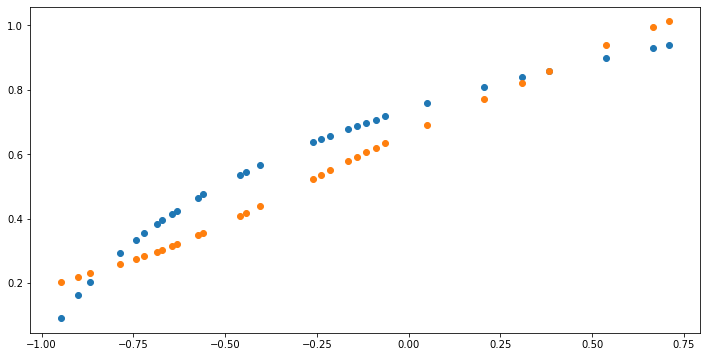

In [26]:
plt.figure(figsize=(12,6))
#plt.plot(,,color = 'red')
plt.scatter(X_test,y_test)
plt.scatter(X_test,y_pred)
plt.show()

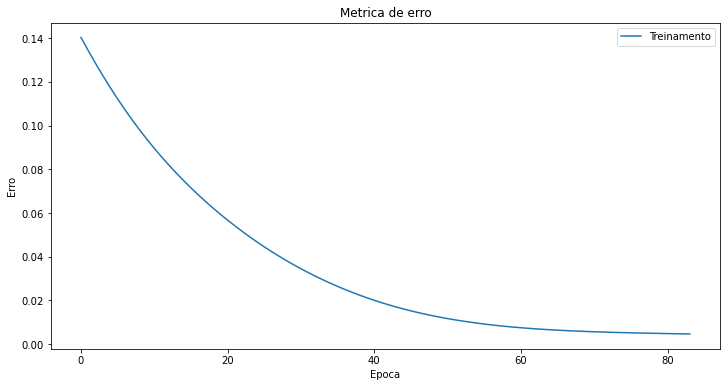

In [27]:
#plot do erro
plt.figure(figsize=(12,6))
plt.plot(regr.loss_curve_)
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento'])
plt.show()

In [28]:
print('Error atual:',regr.loss_)
print('Melhor erro:',regr.best_loss_)

Error atual: 0.004599296842588669
Melhor erro: 0.004599296842588669


## Letra c

In [29]:
x = np.linspace(0,1,100)
y = 10*x**5 + 5*x**4 + 2*x**3 - 0.5*x**2 + 3*x + 2 

minmax = MinMaxScaler(feature_range=(-1, 1))
x = minmax.fit_transform(x.reshape(-1,1).astype(np.float64))


y = y.reshape(-1,1)


In [30]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size= 0.3)

In [31]:
regr = MLPRegressor( max_iter=3000).fit(X_train, y_train.ravel())

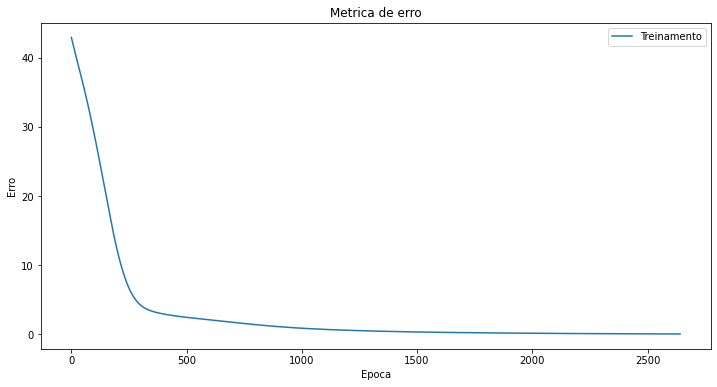

In [32]:
plt.figure(figsize=(12,6))
plt.plot(regr.loss_curve_)
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento'])
plt.show()

In [33]:
print('Error atual:',regr.loss_)
print('Melhor erro:',regr.best_loss_)

Error atual: 0.05762863991878301
Melhor erro: 0.05762863991878301


In [34]:
y_pred = regr.predict(X_test)

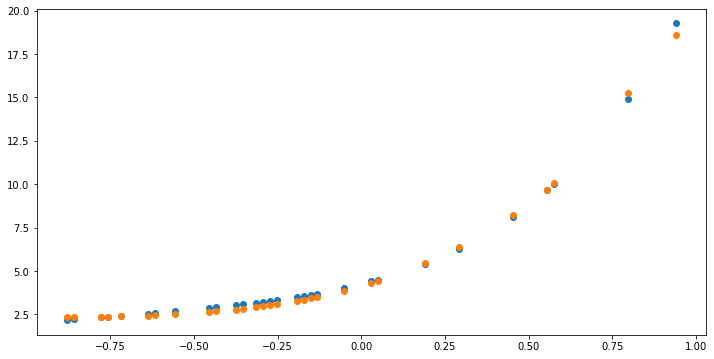

In [35]:
plt.figure(figsize=(12,6))
plt.scatter(X_test,y_test)
plt.scatter(X_test,y_pred)
plt.show()

# Questão 3

In [36]:
def create_data_3(rangex):
    x = np.random.uniform(-1,1,rangex)
    y = np.random.uniform(-1,1,rangex)
    
    data = pd.DataFramepd.DataFrame(data={'x':[0.1], 'y': [0.1], 'class': [0]})
    

In [37]:
def gerador(n_exemplos):
    #gerando dados aleatorios sem classe
    x = np.random.uniform(-1,1,n_exemplos)
    y = np.random.uniform(-1,1,n_exemplos)
    
    #cirando dataframe para adicionar as classes e classificar os dados
    dados = pd.DataFrame(data={'x':[0.1], 'y': [0.1], 'Class': [0]})
    
    #adicionando os dados ao final do dataframe e dando uma classe a eles
    for i in range(n_exemplos):
        if ( y[i] <= 1 - x[i] and x[i] >= 0 and y[i] >= 0 ):
            dados.loc[len(dados)] = [x[i],y[i],0]
            
        elif ( y[i] <= x[i] + 1 and x[i] <= 0 and y[i]>=0 ):
            dados.loc[len(dados)] = [x[i],y[i],1]
            
        elif ( y[i] >= -x[i] - 1 and x[i] <= 0 and y[i] <= 0 ):
            dados.loc[len(dados)] = [x[i],y[i],2]
            
        elif ( y[i] >= x[i] - 1 and x[i] >= 0 and y[i] <= 0 ):
            dados.loc[len(dados)] = [x[i],y[i],3]
            
        elif ( y[i] >= 1 - x[i] and x[i] >= 0 and y[i] >= 0  and x[i]**2 + y[i]**2 <=1 ):
            dados.loc[len(dados)] = [x[i],y[i],4]
            
        elif ( y[i] >= x[i] + 1 and x[i] <= 0 and y[i]>=0 and x[i]**2 + y[i]**2 <=1 ):
            dados.loc[len(dados)] = [x[i],y[i],5]
            
        elif ( y[i] <= -x[i] - 1 and x[i] <= 0 and y[i] <= 0 and x[i]**2 + y[i]**2 <=1 ):
            dados.loc[len(dados)] = [x[i],y[i],6]
            
        elif ( y[i] <= x[i] - 1 and x[i] >= 0 and y[i] <= 0 and x[i]**2 + y[i]**2 <=1 ):
            dados.loc[len(dados)] = [x[i],y[i],7]
        #dados restantes que não se encaixam nas retas
        '''else:
            dados.loc[len(dados)] = [x[i],y[i],8]'''
            
    return dados

In [38]:
dados_circulo = gerador(5000)

In [39]:
dados_circulo.head()

,x,y,Class
0,0.100000,0.100000,0.0
1,0.285488,-0.106547,3.0
2,0.545195,-0.288026,3.0
3,0.146486,0.689469,0.0
4,-0.687440,0.515428,5.0


In [40]:
def plot2d(df):
    
    classes = df['Class'].unique()
    
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    
    for classe in classes:
        valores = df[df['Class'] == classe].values
        x,y = valores[:,0] , valores[:,1]
        ax.scatter(x,y, label=classe)
    
    #círculo
    theta = np.linspace( 0 , 2 * np.pi , 100) 
  
    raio = 1
  
    a = raio * np.cos( theta ) 
    b = raio * np.sin( theta ) 
    
    #reta 1
    x1 = np.linspace(0,1,100)
    f1 = lambda x: 1 - x
    y1 = f1(x1)
    
    #reta 2
    x2 = np.linspace(-1,0,100)
    f2 = lambda x: 1 + x
    y2 = f2(x2)
    
    #reta 3
    x3 = np.linspace(-1,0,100)
    f3 = lambda x: - 1 - x
    y3 = f3(x3)
    
    #reta 4
    x4 = np.linspace(0,1,100)
    f4 = lambda x: x - 1
    y4 = f4(x4)
    
    #eixo x e y
    x = np.linspace(-1,1,100)
    y = np.linspace(-1,1,100)
    
    ax.plot(a,b, x1,y1, x2,y2, x3,y3 , x4,y4, c='black')
    ax.plot(np.zeros((100,)),y, x,np.zeros((100,)) ,c='black')
    ax.set_title("Distribuição das Classes")
    ax.legend(loc="best")



In [41]:
len(dados_circulo)

3976

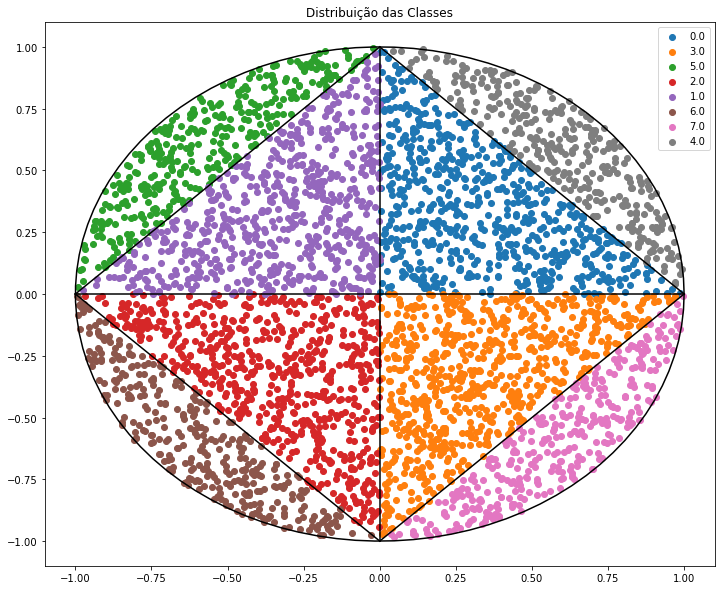

In [42]:
plot2d(dados_circulo)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(dados_circulo[['x','y']].values,dados_circulo[['Class']].values, test_size=0.3)

In [44]:
y_train

array([[2.],
       [1.],
       [2.],
       ...,
       [3.],
       [0.],
       [4.]])

In [45]:
one = OneHotEncoder(sparse=False)

In [46]:
y_train = one.fit_transform(y_train)
y_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Sem regra do momento

In [47]:
regr = MLPRegressor( max_iter=3000,momentum=0.0).fit(X_train, y_train)

y_pred = regr.predict(X_test)
pred = np.argmax(y_pred, axis=1)# posição do maior valor

print(classification_report(y_test,pred))
print('Matriz de Confusão: \n')
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.97      0.94      0.96       200
         1.0       0.99      0.97      0.98       192
         2.0       0.96      0.94      0.95       197
         3.0       0.91      0.97      0.94       195
         4.0       0.96      0.98      0.97        88
         5.0       0.97      1.00      0.98        98
         6.0       0.97      0.94      0.96       109
         7.0       0.96      0.96      0.96       114

    accuracy                           0.96      1193
   macro avg       0.96      0.96      0.96      1193
weighted avg       0.96      0.96      0.96      1193

Matriz de Confusão: 

[[189   0   0   6   4   1   0   0]
 [  3 187   0   0   0   2   0   0]
 [  0   1 185   8   0   0   3   0]
 [  0   0   2 189   0   0   0   4]
 [  2   0   0   0  86   0   0   0]
 [  0   0   0   0   0  98   0   0]
 [  0   0   6   0   0   0 103   0]
 [  0   0   0   4   0   0   0 110]]


In [48]:
pred

array([0, 6, 5, ..., 3, 3, 6], dtype=int64)

In [49]:
y_pred[0]

array([ 0.86283244,  0.16584604, -0.07203085,  0.13921472, -0.02222985,
       -0.04029056,  0.01129309, -0.0224698 ])

In [50]:
y_test

array([[0.],
       [6.],
       [5.],
       ...,
       [3.],
       [3.],
       [6.]])

### Com regra do momento


In [51]:
regr = MLPRegressor( max_iter=3000, momentum=0.9).fit(X_train, y_train)

y_pred = regr.predict(X_test)

pred = np.argmax(y_pred, axis=1)
print(classification_report(y_test,pred))
print('Matriz de Confusão: \n')
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.98      0.95      0.97       200
         1.0       0.99      0.97      0.98       192
         2.0       0.95      0.96      0.96       197
         3.0       0.95      0.98      0.96       195
         4.0       0.95      0.99      0.97        88
         5.0       0.97      0.99      0.98        98
         6.0       0.98      0.93      0.95       109
         7.0       0.96      0.98      0.97       114

    accuracy                           0.97      1193
   macro avg       0.97      0.97      0.97      1193
weighted avg       0.97      0.97      0.97      1193

Matriz de Confusão: 

[[190   0   0   4   5   1   0   0]
 [  2 186   2   0   0   2   0   0]
 [  0   0 190   4   0   0   2   1]
 [  0   0   0 191   0   0   0   4]
 [  1   0   0   0  87   0   0   0]
 [  0   1   0   0   0  97   0   0]
 [  0   0   8   0   0   0 101   0]
 [  0   0   0   2   0   0   0 112]]


# Questão 4

In [52]:
f = lambda x : np.sin(x)**2 + np.cos(x + np.cos(x)) 

In [53]:
x = np.arange(0,100)
data = pd.DataFrame(f(x), index=x, columns=["f(x)"])

<AxesSubplot:>

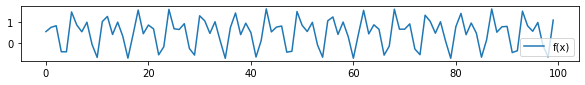

In [54]:
data.plot(figsize=(10,1))

In [55]:
data

,f(x)
0,0.540302
1,0.738563
2,0.813765
3,-0.405311
4,-0.406359
...,...
95,0.555134
96,0.966451
97,-0.109378
98,-0.649542


In [56]:
def gen_st(data,time):
    new_data = pd.DataFrame()
    for i in range(time,0,-1):
        new_data[f'x_{(time+1)-i}'] = data.shift(i)
    new_data = new_data.iloc[time:]
    return new_data

In [57]:
time = 10

In [58]:
new_data = gen_st(data['f(x)'],time)

In [59]:
new_data

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10
10,0.540302,0.738563,0.813765,-0.405311,-0.406359,1.460239,0.857538,0.531544,0.978311,-0.062893
11,0.738563,0.813765,-0.405311,-0.406359,1.460239,0.857538,0.531544,0.978311,-0.062893,-0.669434
12,0.813765,-0.405311,-0.406359,1.460239,0.857538,0.531544,0.978311,-0.062893,-0.669434,1.008832
13,-0.405311,-0.406359,1.460239,0.857538,0.531544,0.978311,-0.062893,-0.669434,1.008832,1.249658
14,-0.406359,1.460239,0.857538,0.531544,0.978311,-0.062893,-0.669434,1.008832,1.249658,0.404245
...,...,...,...,...,...,...,...,...,...,...
95,-0.660392,0.151278,1.598441,0.511969,0.764930,0.782695,-0.441869,-0.356902,1.496792,0.810846
96,0.151278,1.598441,0.511969,0.764930,0.782695,-0.441869,-0.356902,1.496792,0.810846,0.555134
97,1.598441,0.511969,0.764930,0.782695,-0.441869,-0.356902,1.496792,0.810846,0.555134,0.966451
98,0.511969,0.764930,0.782695,-0.441869,-0.356902,1.496792,0.810846,0.555134,0.966451,-0.109378


In [60]:
X = new_data[[f'x_{i}' for i in range(1,time+1)]].values
y = new_data[['x_1','x_2','x_3']].values
rangex =len(X)

X_train, y_train = X[:int(len(x)/10)*8],y[:int(len(x)/10)*8]
X_test, y_test = X[int(len(x)/10)*8:], y[int(len(x)/10)*8:] 

In [61]:
len(X_train)

80

In [62]:
regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)

In [63]:
y_pred = regr.predict(X_test)

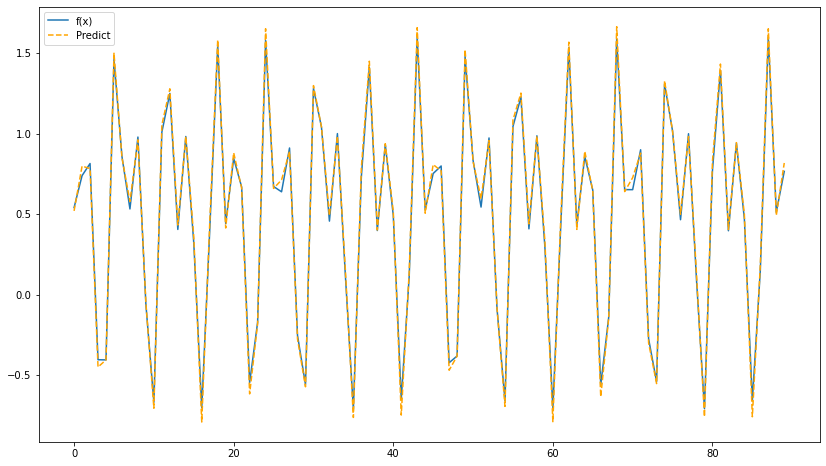

In [64]:
figure = plt.figure(figsize=(14,8))
axis = figure.add_subplot(111)

axis.plot(x[:rangex],f(x[:rangex]), label='f(x)')

axis.plot(x[:rangex], regr.predict(X)[:,0],'--',color = 'orange',label='Predict' )#plot correto pois começa do local correto
#axis.plot(x[:rangex], regr.predict(X)[:,1],label='Predict1' )
#axis.plot(x[:rangex], regr.predict(X)[:,2],label='Predict2' )
axis.legend(loc='best')

In [65]:
print(f"MSE: {0.5*np.mean((y_test-y_pred)**2)} ")#Erro Quadrático Médio

MSE: 0.0011916907080189382 
